<a href="https://colab.research.google.com/github/yangyLab/Chemo-mechanical-coupling/blob/main/Poisson1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install deepxde

In [9]:
import deepxde as dde
from deepxde.backend import tf
import matplotlib.pyplot as plt
import numpy as np

Compiling model...
Building feed-forward neural network...
'build' took 0.069728 s



/usr/local/lib/python3.7/dist-packages/skopt/sampler/sobol.py:250: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+18=18. 
  total_n_samples))
/usr/local/lib/python3.7/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:110: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_constraint=self.kernel_constraint,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 0.809101 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric
0         [4.70e+01, 2.91e-02]    [4.96e+01, 2.91e-02]    []  
1000      [1.16e-03, 1.46e-06]    [1.54e-03, 1.46e-06]    []  
2000      [1.00e-04, 1.73e-08]    [2.47e-04, 1.73e-08]    []  
3000      [6.42e-05, 3.15e-06]    [2.10e-04, 3.15e-06]    []  
4000      [1.61e-05, 6.46e-09]    [9.32e-05, 6.46e-09]    []  
5000      [3.53e-05, 2.65e-06]    [5.57e-05, 2.65e-06]    []  
6000      [1.01e-05, 1.77e-08]    [7.04e-05, 1.77e-08]    []  
7000      [1.84e-05, 1.10e-07]    [8.29e-05, 1.10e-07]    []  
8000      [9.22e-06, 1.85e-07]    [4.84e-05, 1.85e-07]    []  
9000      [9.55e-05, 7.00e-06]    [1.77e-04, 7.00e-06]    []  
10000     [1.65e-04, 1.56e-05]    [2.42e-04, 1.56e-05]    []  

Best model at step 8000:
  train loss: 9.41e-06
  test loss: 4.85e-05
  test metric: []

'train' took 11.728922 s

Saving loss history to /content/loss.dat ...
Savi

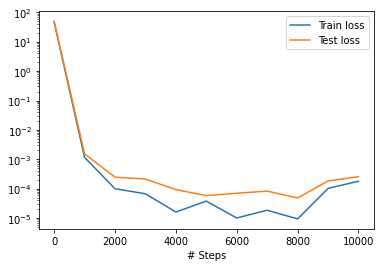

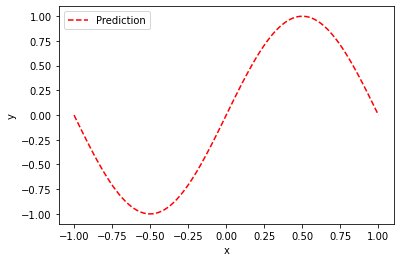

In [24]:
def pde(x,y):
    dy_dx = dde.grad.hessian(y,x)
    return -dy_dx - np.pi ** 2 * tf.sin(np.pi * x)

def boundary(x,_):
    return np.isclose(x[0],-1) or np.isclose(x[0],1)

def func(x):
    return 0

def func1(x):
    return np.sin(np.pi * x)

geom = dde.geometry.Interval(-1,1)
bc = dde.DirichletBC(geom,func,boundary)
data = dde.data.PDE(geom,pde,bc,16,2,num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001)

losshistory, train_state = model.train(epochs=10000)


dde.saveplot(losshistory,train_state,issave=True,isplot=True)

x=geom.uniform_points(1000,True)
y=model.predict(x,operator=pde)
#plt.figure()
#plt.plot(x,y)
#plt.xlabel("x")
#plt.ylabel("PDE residual")
#plt.show()

In [26]:
train_state.y_pred_train

array([[ 0.00423475],
       [-0.00364767],
       [ 0.00423475],
       [-0.00364767],
       [ 0.998811  ],
       [-0.99804765],
       [-0.7062419 ],
       [ 0.70442736],
       [ 0.7070048 ],
       [-0.7036702 ],
       [-0.92117685],
       [ 0.9233071 ],
       [ 0.37935266],
       [-0.38209483],
       [-0.9225422 ],
       [ 0.9219364 ],
       [ 0.38287893],
       [-0.3786638 ],
       [-0.5518233 ],
       [ 0.55563724]], dtype=float32)